# Connect Database

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Library

In [2]:
# Author - Kaveesha Baddage

# Install spaCy and neuralcoref with correct versions 

# !pip install -U spacy==2.1.0 

!python -m spacy download en

# !pip uninstall -y neuralcoref 

# !pip install neuralcoref --no-binary neuralcoref

!pip install pattern
!pip install clean-text
!pip -q install pythainlp
!pip install wordcloud

2023-05-15 14:41:48.205602: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 14:41:49.958641: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 75.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 4

In [3]:
# Import necessary libraries
import keras
import numpy as np
import pandas as pd
import nltk
import os
import nltk.corpus
# import spacy
# import neuralcoref

In [4]:
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Load Data

In [5]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime_th.txt', sep='|', )
sanook

,title,content
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...
...,...,...
992,เฒ่าหื่นทำอนาจาร ด.ญ.4 ขวบจนเลือดซึม ยังปฏิเสธ...,ตำรวจ สภ.นาโพธิ์ จ.บุรีรัมย์ ได้ควบคุมตัวเฒ่าเ...
993,รปภ.ตามจีบสาว รปภ.ด้วยกัน ฝ่ายหญิงไม่เล่นด้วย ...,เมื่อเวลา 09.00 น. วันที่ 21 กันยายน พ.ต.ต.สถิ...
994,6 ล้อเบรกแตก! พุ่งชนจยย. ดับ 2 ศพ ชาวบ้านรุมตื...,รถบรรทุก 6 ล้อ ขนคนงานเบรกแตกชนจยย. กลางแยกพร้...
995,นายหน้าจ้างเด็กหญิงวัย 13 ไปทำงานแม่บ้าน ที่แท...,นายหน้าจ้างเด็กหญิงวัย 13 ไปทำงานแม่บ้าน ที่แท...


In [6]:
thairath = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_crime_thairath_th.txt', sep='|' )
thairath

,title,content
0,"ให้ออก ""ดาบตำรวจชิงทอง"" สั่งเด้ง ผกก.สภ.เอราวั...","ผบก.ภ.จว.เลย เซ็นคำสั่งให้ ""ดาบตำรวจสมภพ"" ผบ.ห..."
1,พล.ต.อ.วิระชัย ทรงเมตตา โกนหัวบวชแล้ววัดโพธิ์ ...,"เข้าสู่ร่มกาสาวพัสตร์ ""พล.ต.อ.วิระชัย ทรงเมตตา..."
2,ดาบตำรวจชิงทอง สารภาพเครียดหนี้ท่วม มีปากเสียง...,บิ๊กโจ๊ก พล.ต.อ.สุรเชษฐ์ หักพาล รอง ผบ.ตร. แถล...
3,กู้ภัยงมเจอหลักฐานสำคัญ ขวาน-มีดของกลาง หนุ่มโ...,กู้ภัยงมเจอขวาน-มีดของกลาง หนุ่มโหดใช้หั่นศพเซ...
4,ปคม.บุกจับผับเถื่อนมหาสารคาม ไม่มีใบอนุญาต ปล่...,"ตำรวจ ปคม. ลุยจับสถานบันเทิง ""เมโลดี้"" ปล่อยเด..."
...,...,...
1995,ร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์ หลอก 90 ล้าน ตั...,ตัวแทนผู้เสียหายร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์...
1996,ไม่มีเซอร์ไพรส์ อัยการดาวชี้คดีแตงโม ไร้หลักฐา...,อัยการดาว ชี้คดีแตงโม ไม่ได้มีหลักฐานใหม่ใดๆ ต...
1997,"191 ติดยศ ""สุนัขตำรวจตรี"" ให้ ""ไอร่า-โคล่าร์"" ...",ผู้การ 191 ติดยศให้รางวัลสุนัขตำรวจ ประจำปี 25...
1998,รวบ 3 หนุ่มซ่าเร่ขายกัญชา ปล้นทรัพย์นักท่องเที...,3 หนุ่มเร่ขายกัญชาถนนข้าวสาร ถูกจับร่วมกันปล้น...


In [7]:
df_raw_crime = pd.concat([sanook, thairath], join="inner", ignore_index=True)
df_raw_crime

,title,content
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...
...,...,...
2992,ร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์ หลอก 90 ล้าน ตั...,ตัวแทนผู้เสียหายร้อง ผบ.ตร.ถูกแก๊งคอลเซ็นเตอร์...
2993,ไม่มีเซอร์ไพรส์ อัยการดาวชี้คดีแตงโม ไร้หลักฐา...,อัยการดาว ชี้คดีแตงโม ไม่ได้มีหลักฐานใหม่ใดๆ ต...
2994,"191 ติดยศ ""สุนัขตำรวจตรี"" ให้ ""ไอร่า-โคล่าร์"" ...",ผู้การ 191 ติดยศให้รางวัลสุนัขตำรวจ ประจำปี 25...
2995,รวบ 3 หนุ่มซ่าเร่ขายกัญชา ปล้นทรัพย์นักท่องเที...,3 หนุ่มเร่ขายกัญชาถนนข้าวสาร ถูกจับร่วมกันปล้น...


In [8]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport_th.txt', sep='|', )
sanook

,title,content
0,"เล่นได้ทุกวัน! เปิดวาร์ป ""คิม มี-จู"" นางแบบแดน...",พาไปรู้จักกับ คิม มี-จู หนึ่งในคนดังทางโซเชียล...
1,"อกใหญ่เป็นเหตุ! ""มินามิ วาจิ"" จากอดีตนักว่ายน้...",ถือเป็นอีกหนึ่งสาวสวยแดนปลาดิบที่มีแฟนคลับหนุ่...
2,ขี่ลา : กีฬาสายแหวกมากความหมายที่นิยมตั้งแต่อเ...,โลกใบนี้ยังมีอะไรอีกมากให้เราค้นหา กีฬาก็เช่นก...
3,สรุปผลบอลพรีเมียร์ลีก นัดที่ 2 วันที่ 13-15 ส....,หัวตาราง แมนซิตี้ เปิดบ้านชนะ 4-0 ในนัดนี้ ขึ้...
4,"นางฟ้าชัดๆ ""พักตร์ เพ็ญพักตร์"" นางแบบสาวสุดเอ็...",ถือเป็นอีกหนึ่งสาวที่ชื่นชอบการออกกำลังกายด้วย...
...,...,...
993,ไม่ทำให้ผิดหวัง! ไทย ทุบ ไต้หวัน 3-1 เฮ 2 นัดต...,วันที่ 7 ตุลาคม 2565 เวลา 16:00 น. ที่เวียด ตร...
994,เกินต้านทาน! วอลเลย์บอลหญิงไทย พ่าย เซอร์เบีย ...,ศึกวอลเลย์บอลหญิงชิงแชมป์โลก 2022 ที่ เนเธอร์แ...
995,รัวครึ่งหลัง! บุรีรัมย์ ยูไนเต็ด บุกอัด ลำพูน ...,การแข่งขันฟุตบอลไฮลักซ์ รีโว่ ไทยลีก 2022/23 น...
996,"ตกรอบแต่ประทับใจ! คอมเมนต์ต่างชาติถึง ""วอลเลย์...",ผ่านไปแล้ว 3 นัดสำหรับทีมลูกยางสาวไทย ในการแข่...


In [9]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_sport_thaipbs_th.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,เข้มข้น ทำคะแนน 1 โอเวอร์พาร์ ในการแข่งขันเนชั...,วันนี้ (21 ส.ค.2563) ความเคลื่อนไหวของ เข้มข้น...
1,เข้มข้นทำสกอร์สองวัน 4 อันเดอร์พาร์ ผ่านเข้ารอ...,วันนี้ (15 ส.ค.2563) ผู้สื่อข่าวรายงาน ความเคล...
2,“มาดามแป้ง” ลั่นพร้อมสนับสนุนวงการกอล์ฟอาชีพสต...,ความเคลื่อนไหวของสมาคมกีฬาอาชีพกอล์ฟสตรี หลังไ...
3,ยูเซน โบลท์ ติดเชื้อไวรัสโควิด-19 หลังเพิ่งจั...,ยูเซน โบลท์ ตำนานนักวิ่งระยะสั้นเจ้าของสถิติโล...
4,ตะวัน พอใจกับฟอร์มการเล่นนัดล่าสุด,วันนี้ (18 ส.ค.2563) ผู้สื่อข่าวรายงาน ความเคล...
...,...,...
1203,ชบาแก้ว ซ้อมครั้งแรกที่กัมพูชา พร้อมลงสนามพบสิ...,ทัพชบาแก้วไทย เตรียมลงสนามนัดแรกในซีเกมส์ พบกั...
1204,กัมพูชา ยืนยันความพร้อมจัดซีเกมส์2023 พิธีเปิด...,กัมพูชา ยืนยันความพร้อมจัดการแข่งขันกีฬาซีเกมส...
1205,“เมสซี” เตรียมย้ายทีม ไม่ต่อสัญญา “ปารีส แซงต์...,“ลิโอเนล เมสซี” จะไม่ต่อสัญญากับ “ปารีส แซงต์ ...
1206,"เปิดประวัติ โอม ""ชนาธิป จักรวาฬ"" ผู้ถือธงชาติไ...","รู้จัก ""ชนาธิป จักรวาฬ"" หรือ โอม นักกีฬาบาสเกต..."


In [10]:
df_raw_sport = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_sport

,title,content
0,"เล่นได้ทุกวัน! เปิดวาร์ป ""คิม มี-จู"" นางแบบแดน...",พาไปรู้จักกับ คิม มี-จู หนึ่งในคนดังทางโซเชียล...
1,"อกใหญ่เป็นเหตุ! ""มินามิ วาจิ"" จากอดีตนักว่ายน้...",ถือเป็นอีกหนึ่งสาวสวยแดนปลาดิบที่มีแฟนคลับหนุ่...
2,ขี่ลา : กีฬาสายแหวกมากความหมายที่นิยมตั้งแต่อเ...,โลกใบนี้ยังมีอะไรอีกมากให้เราค้นหา กีฬาก็เช่นก...
3,สรุปผลบอลพรีเมียร์ลีก นัดที่ 2 วันที่ 13-15 ส....,หัวตาราง แมนซิตี้ เปิดบ้านชนะ 4-0 ในนัดนี้ ขึ้...
4,"นางฟ้าชัดๆ ""พักตร์ เพ็ญพักตร์"" นางแบบสาวสุดเอ็...",ถือเป็นอีกหนึ่งสาวที่ชื่นชอบการออกกำลังกายด้วย...
...,...,...
2201,ชบาแก้ว ซ้อมครั้งแรกที่กัมพูชา พร้อมลงสนามพบสิ...,ทัพชบาแก้วไทย เตรียมลงสนามนัดแรกในซีเกมส์ พบกั...
2202,กัมพูชา ยืนยันความพร้อมจัดซีเกมส์2023 พิธีเปิด...,กัมพูชา ยืนยันความพร้อมจัดการแข่งขันกีฬาซีเกมส...
2203,“เมสซี” เตรียมย้ายทีม ไม่ต่อสัญญา “ปารีส แซงต์...,“ลิโอเนล เมสซี” จะไม่ต่อสัญญากับ “ปารีส แซงต์ ...
2204,"เปิดประวัติ โอม ""ชนาธิป จักรวาฬ"" ผู้ถือธงชาติไ...","รู้จัก ""ชนาธิป จักรวาฬ"" หรือ โอม นักกีฬาบาสเกต..."


In [11]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_money_th.txt', sep='|', )
sanook

,title,content
0,เช็คสิทธิประกันสังคม ม.33 ม.39 ม.40 ด้วยบัตรปร...,เช็กสิทธิประกันสังคม ม.33 ม.39 ม.40 ทำได้ไม่ยา...
1,รู้จัก โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่น...,โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่นล้านของ...
2,ประเทศอาเซียน 10 ประเทศ ที่คุณควรรู้จัก,10 ประเทศอาเซียน หรือ สมาคมประชาชาติแห่งเอเชีย...
3,ประกันสังคมมาตรา 33 กลุ่มลูกจ้าง-พนักงานเอกชน ...,ผู้ประกันตนประกันสังคม มาตรา 33 ต้องรู้! เชื่อ...
4,เชน ธนา เจ้าของธุรกิจคอลลาเจน ปั้นแบรนด์มากว่า...,เชน ธนา หรือ ธนาตรัยฉัตร ภูโชคอนันต์ เจ้าของธุ...
...,...,...
994,ไทยสร้างไทย ชูนโยบายแก้เพิ่มสร้าง ปลดล็อกเศรษฐ...,นายโภคิน พลกุล ประธานยุทธศาสตร์ขับเคลื่อนประเท...
995,‘สุพันธุ์’ ปัดแข่งแจกเงิน ‘เพื่อไทย’ โต้ชู “แก...,นายสุพันธุ์ มงคลสุธี รองหัวหน้าพรรคไทยสร้างไทย...
996,อัปเดตลงทะเบียนบัตรสวัสดิการแห่งรัฐ 2565 วิธีแ...,คลังเผยวิธีแก้ไขสำหรับผู้ลงทะเบียนบัตรสวัสดิกา...
997,ราคาทองวันนี้ 11/10/65 ครั้งที่ 1 ร่วง 150 บาท...,อัปเดต ราคาทองวันนี้ล่าสุด ราคาทองคำ เปิดตลาดเ...


In [12]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_economic_thaipbs_th.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,เตรียมความพร้อมสุวรรณภูมิ รับเปิดประเทศ 1 พ.ค.นี้,กระทรวงคมนาคมเตรียมความพร้อมท่าอากาศยานสุวรรณภ...
1,ประมงภาคกลางกระทบหนัก อาจแบกภาระน้ำมันแพงไม่ไหว,หลัง กบน.มีมติจะปรับขึ้นราคาน้ำมันดีเซลลอยตัวส...
2,ม.หอการค้า สำรวจแรงงานไทย 1.2 พันคน พบ 99% แบก...,ศูนย์พยากรณ์เศรษฐกิจ และธุรกิจ มหาวิทยาลัยหอกา...
3,"การรถไฟฯ ทดสอบเดินรถ ""อุลตร้าแมน"" หัวรถจักรดีเ...",การรถไฟฯ ทดสอบเดินรถ “อุลตร้าแมน” หัวรถจักรดีเ...
4,กางไทม์ไลน์ “รถไฟฟ้าสายสีแดงส่วนต่อขยาย” 4 เส้...,“ศักดิ์สยาม” กางไทม์ไลน์ “รถไฟสายสีแดงส่วนต่อข...
...,...,...
779,แรงงานยื่น 7 ข้อเรียกร้อง เพิ่มหลักประกันความม...,สภาองค์การลูกจ้างสภาแรงงานแห่งประเทศไทย เดินขบ...
780,“ออมสิน” ปล่อยกู้ติดตั้งหลังคาโซลาเซลล์ ผ่อนแ...,“ออมสิน” เปิดให้กู้ติดตั้งหลังคาโซลาร์เซลล์ หน...
781,"ครม.ไฟเขียว งบฯ สำรอง 10,464 ล้านบาท ช่วยลดค่า...",ครม.อนุมัติงบประมาณสำรอง จ่ายเพื่อกรณีฉุกเฉินห...
782,กบน.ลดราคาดีเซล เหลือ 32.50 บาท/ลิตร มีผล 4 พ....,ข่าวดีรับวันแรงงานแห่งชาติ สำนักงานกองทุนน้ำมั...


In [13]:
df_raw_business = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_business

,title,content
0,เช็คสิทธิประกันสังคม ม.33 ม.39 ม.40 ด้วยบัตรปร...,เช็กสิทธิประกันสังคม ม.33 ม.39 ม.40 ทำได้ไม่ยา...
1,รู้จัก โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่น...,โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่นล้านของ...
2,ประเทศอาเซียน 10 ประเทศ ที่คุณควรรู้จัก,10 ประเทศอาเซียน หรือ สมาคมประชาชาติแห่งเอเชีย...
3,ประกันสังคมมาตรา 33 กลุ่มลูกจ้าง-พนักงานเอกชน ...,ผู้ประกันตนประกันสังคม มาตรา 33 ต้องรู้! เชื่อ...
4,เชน ธนา เจ้าของธุรกิจคอลลาเจน ปั้นแบรนด์มากว่า...,เชน ธนา หรือ ธนาตรัยฉัตร ภูโชคอนันต์ เจ้าของธุ...
...,...,...
1778,แรงงานยื่น 7 ข้อเรียกร้อง เพิ่มหลักประกันความม...,สภาองค์การลูกจ้างสภาแรงงานแห่งประเทศไทย เดินขบ...
1779,“ออมสิน” ปล่อยกู้ติดตั้งหลังคาโซลาเซลล์ ผ่อนแ...,“ออมสิน” เปิดให้กู้ติดตั้งหลังคาโซลาร์เซลล์ หน...
1780,"ครม.ไฟเขียว งบฯ สำรอง 10,464 ล้านบาท ช่วยลดค่า...",ครม.อนุมัติงบประมาณสำรอง จ่ายเพื่อกรณีฉุกเฉินห...
1781,กบน.ลดราคาดีเซล เหลือ 32.50 บาท/ลิตร มีผล 4 พ....,ข่าวดีรับวันแรงงานแห่งชาติ สำนักงานกองทุนน้ำมั...


In [14]:
sanook = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politic_th.txt', sep='|', )
sanook

,title,content
0,ธรรมนัสเตือนรัฐมนตรีปากเก่ง ระวังหลุดเก้าอี้คา...,ร้อยเอก ธรรมนัส พรหมเผ่า สมาชิกสภาผู้แทนราษฎร ...
1,ว่าที่ผู้ว่าฯ ชัชชาติ ร่วมพิธีเบิกเนตร ท้าวเวส...,ชัชชาติ-ปวีณา-ศิธา ร่วมพิธีเบิกเนตร ท้าวเวสสุว...
2,รัฐมนตรีสาธิต ย้ำฝีดาษลิงไร้ผู้ติดเชื้อในประเท...,นายสาธิต ปิตุเตชะ รัฐมนตรีช่วยว่าการกระทรวงสาธ...
3,อดีต กกต. ลั่นไร้กังวลหากประยุทธ์พ้นเก้าอี้ เช...,นายสมชัย ศรีสุทธิยากร อดีตกรรมการการเลือกตั้ง ...
4,หมอระวี เตือนรัฐบาล! คนแดนไกล-ฝ่ายค้าน-ธรรมนัส...,วันนี้ (27 พ.ค.) นพ.ระวี มาศฉมาดล ส.ส.บัญชีราย...
...,...,...
714,ผู้แทนยูเอ็น ห่วงสิทธิชุมนุมเยาวชนไทย! แอมเนสต...,นายเกลมองต์ วูล ผู้รายงานพิเศษขององค์กรสหประชา...
715,"ฟ้าผ่า ""สารวัตรซัว"" ให้ออกจากราชการไว้ก่อน ปมเ...","ฟ้าผ่า ""สารวัตรซัว"" ให้ออกจากราชการไว้ก่อน เซ่..."
716,กกต. กรุงเทพฯ เผย 8 รูปแบบเขตเลือกตั้ง ส.ส. พร...,คณะกรรมการการเลือกตั้ง (กกต.) กรุงเทพมหานคร เป...
717,ประวิตร มอบ ธรรมนัส ดูแลพลังประชารัฐหาเสียงเหน...,พลเอก ประวิตร วงษ์สุวรรณ หัวหน้าพรรคพลังประชาร...


In [15]:
thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_politics_thaipbs_th.txt', sep='|', names=['title','content'], header=None)
thaipbs

,title,content
0,การเมืองคึกคัก! หลายพรรคทยอยเปิดนโยบายเพิ่ม,หลายพรรคการเมือง ลงพื้นที่หาเสียงอย่างเข้มข้นช...
1,สุดารัตน์ เปิดตัว 8 ว่าที่ผู้สมัคร ส.ส. พร้อมช...,สุดารัตน์ เปิดตัว 8 ว่าที่ผู้สมัคร ส.ส. พร้อม...
2,"เปิดวาร์ป ""นรุตม์ชัย บุนนาค"" หลานปู่ ""มารุต"" แ...","นายนรุตม์ชัย บุนนาค หรือ""ป๋อม""วัย 32 ปี ว่าที่..."
3,ชัยธวัช ดักคอ ส.ส.รัฐบาล อย่าเล่นเกมสภาล่มหนีอ...,ชัยธวัช ดักคอ ส.ส.รัฐบาลอย่าเล่นเกมสภาล่ม หนีอ...
4,นิกร วอน รัฐบาล-ฝ่ายค้าน ทำหน้าที่กอบกู้ภาพพจน...,นิกร วอน รัฐบาล-ฝ่ายค้าน ทำหน้าที่กอบกู้ภาพพจน...
...,...,...
855,"เลือกตั้ง2566 : ผลซูเปอร์โพล ครั้งที่ 7 ""พท."" ...","เปิดผลสำรวจซูเปอร์โพล ครั้งที่ 7 ""เพื่อไทย"" ได..."
856,"เลือกตั้ง2566 : ""ประวิตร"" ลงพื้นที่หาเสียง ช่ว...",พล.อ.ประวิตร ลงพื้นที่หาเสียงเลือกตั้งโค้งสุดท...
857,เลือกตั้ง2566 : ม.รามฯ พร้อมจัดเลือกตั้งล่วงหน...,กกต.ลงพื้นที่ตรวจความพร้อม สถานที่จัดเลือกตั้ง...
858,“เสธ.หิ” แนะผู้ใหญ่เปิดใจ ให้ข้อมูลที่ถูกกับคน...,“เสธ.หิ” แนะผู้ใหญ่ฟังความเห็นต่างการเมือง หยุ...


In [16]:
df_raw_politic = pd.concat([sanook, thaipbs], join="inner", ignore_index=True)
df_raw_politic

,title,content
0,ธรรมนัสเตือนรัฐมนตรีปากเก่ง ระวังหลุดเก้าอี้คา...,ร้อยเอก ธรรมนัส พรหมเผ่า สมาชิกสภาผู้แทนราษฎร ...
1,ว่าที่ผู้ว่าฯ ชัชชาติ ร่วมพิธีเบิกเนตร ท้าวเวส...,ชัชชาติ-ปวีณา-ศิธา ร่วมพิธีเบิกเนตร ท้าวเวสสุว...
2,รัฐมนตรีสาธิต ย้ำฝีดาษลิงไร้ผู้ติดเชื้อในประเท...,นายสาธิต ปิตุเตชะ รัฐมนตรีช่วยว่าการกระทรวงสาธ...
3,อดีต กกต. ลั่นไร้กังวลหากประยุทธ์พ้นเก้าอี้ เช...,นายสมชัย ศรีสุทธิยากร อดีตกรรมการการเลือกตั้ง ...
4,หมอระวี เตือนรัฐบาล! คนแดนไกล-ฝ่ายค้าน-ธรรมนัส...,วันนี้ (27 พ.ค.) นพ.ระวี มาศฉมาดล ส.ส.บัญชีราย...
...,...,...
1574,"เลือกตั้ง2566 : ผลซูเปอร์โพล ครั้งที่ 7 ""พท."" ...","เปิดผลสำรวจซูเปอร์โพล ครั้งที่ 7 ""เพื่อไทย"" ได..."
1575,"เลือกตั้ง2566 : ""ประวิตร"" ลงพื้นที่หาเสียง ช่ว...",พล.อ.ประวิตร ลงพื้นที่หาเสียงเลือกตั้งโค้งสุดท...
1576,เลือกตั้ง2566 : ม.รามฯ พร้อมจัดเลือกตั้งล่วงหน...,กกต.ลงพื้นที่ตรวจความพร้อม สถานที่จัดเลือกตั้ง...
1577,“เสธ.หิ” แนะผู้ใหญ่เปิดใจ ให้ข้อมูลที่ถูกกับคน...,“เสธ.หิ” แนะผู้ใหญ่ฟังความเห็นต่างการเมือง หยุ...


In [17]:
df_raw_tech = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_tech_thaipbs_th.txt', sep='|', names=['title','content'], header=None)
df_raw_tech

,title,content
0,นาซ่า เผยภาพ 360 องศาบนดาวอังคาร,นาซ่า เผยภาพ 360 องศาบนดาวอังคาร นาซ่า เปิดเผย...
1,“เฟซบุ๊ก” เปิดฟีเจอร์ส Safety Check ติดตามผู้ร...,“เฟซบุ๊ก” เปิดฟีเจอร์ส Safety Check ติดตามผู้ร...
2,"นาซ่าเผยภาพนาที ""คิวริออสซิตี้"" ลงจอดบนดาวอังคาร",นาซ่าเผยภาพนาที องค์การนาซ่าของสหรัฐเปิดเผยภาพ...
3,5 ปีไทยพีบีเอส ประกวด อนิเมชั่น ส่งเสริมความรู...,เนื่องในโอกาสครบรอบ 5 ปีของสถานีโทรทัศน์ไทยพ...
4,"นวัตกรรม ""ลำโพงกระดาษ"" สู่สื่อสิ่งพิมพ์เล่าเรื...",นวัตกรรม นับจากนี้หนังสืออาจให้ความสุขมากกว่าก...
...,...,...
1613,สำรวจพบ 1 ใน 3 ของการโจมตีทางคอมพิวเตอร์ทั่วโล...,สำรวจพบ 1 ใน 3 ของการโจมตีทางคอมพิวเตอร์ทั่วโล...
1614,ก.ไอซีที เตรียมลงนามสั่งแท็บเล็ตล็อต 2 พรุ่งนี...,ก.ไอซีที เตรียมลงนามสั่งแท็บเล็ตล็อต 2 พรุ่งนี...
1615,ตร.จับเครือข่ายเว็บไซต์พนันบอล ใช้ไทยเป็นคอลเซ...,ตร.จับเครือข่ายเว็บไซต์พนันบอล ใช้ไทยเป็นคอลเซ...
1616,กระทรวงพลังงาน เตรียมหนุนก๊าซชีวภาพ ลดปัญหาขาด...,กระทรวงพลังงาน เตรียมหนุนก๊าซชีวภาพ ลดปัญหาขาด...


In [18]:
# thaipbs = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_entertainment_thaipbs_th.txt', sep='|', names=['title','content'], header=None)
# thaipbs

In [19]:
df_raw_ent = pd.read_csv('/content/drive/MyDrive/AI_Tagging/dataset/data_set_entertainment_khaosod_th.txt', sep='|', names=['title','content'], header=None)
df_raw_ent

,title,content
0,จิ๊บ คีตภัทร บินจากเมืองนอก บี้เอาผิดคนกุข่าว...,จิ๊บ คีตภัทร บินจากเมืองนอก บี้เอาผิดคนกุข่าวเ...
1,นิกกี้ พิ้ม ประกาศช่วยพร้อมหางานให้ อาทิตย์ ร...,ช็อกภาพอดีตพระเอกล่าสุดมรสุมชีวิต นิกกี้ พิ้ม ...
2,มาริโอ้ แฟนมีท จัดแกลลอรี่ภาพวาด “ก้าวกล้า” จ...,จากความคิดถึง “ก้าวกล้า” ในละคร #คือเธอ หรือ B...
3,คริส หอวัง ร้อนฉ่า จัดชุดบาง โชว์เรือนร่าง ตื...,คริส หอวัง ร้อนฉ่า จัดชุดบาง โชว์เรือนร่าง สุด...
4,พิกเล็ท โอดสุขภาพทรุด เจอ 2 เด้ง สุดท้ายต้องเ...,เรียกว่างานนี้เจอเจ็บ 2 เด้งเลยทีเดียวปีนี้ สำ...
...,...,...
1795,ปอย-บิว จักรพันธ์ ตกลงในศาลได้ ยุติปัญหา แจงป...,จบดราม่า? #บิวทำร้ายร่างกายผู้หญิง ‘ปอย พรรธน์...
1796,เรื่องย่อ แม่ปูเปรี้ยว ละครโรแมนติกคอมเมดี้ ส...,เรื่องย่อ แม่ปูเปรี้ยว ละครโรแมนติกคอมเมดี้ สน...
1797,ไม่ร่วมงานกัน10ปี เอ้ ชุติมา - ต้อม รัชนีกร เ...,ถ้ากูเหี้… ไม่ต้องคบ ก็ไม่คบด้วย สองเพื่อนซี้ใ...
1798,กรีน ปล่อยโฮเสียใจสุดสิ่งที่ ธันวา ทำหลังยุติ...,อยากร้องร้องไปเลย…ความรู้สึกคือมันคงตัดขาดกันแ...


In [20]:
# df_raw_ent = pd.concat([khaosod, thaipbs], join="inner", ignore_index=True)
# df_raw_ent

In [21]:
df_raw_sport['tag'] = "sport"
df_raw_sport.head()

,title,content,tag
0,"เล่นได้ทุกวัน! เปิดวาร์ป ""คิม มี-จู"" นางแบบแดน...",พาไปรู้จักกับ คิม มี-จู หนึ่งในคนดังทางโซเชียล...,sport
1,"อกใหญ่เป็นเหตุ! ""มินามิ วาจิ"" จากอดีตนักว่ายน้...",ถือเป็นอีกหนึ่งสาวสวยแดนปลาดิบที่มีแฟนคลับหนุ่...,sport
2,ขี่ลา : กีฬาสายแหวกมากความหมายที่นิยมตั้งแต่อเ...,โลกใบนี้ยังมีอะไรอีกมากให้เราค้นหา กีฬาก็เช่นก...,sport
3,สรุปผลบอลพรีเมียร์ลีก นัดที่ 2 วันที่ 13-15 ส....,หัวตาราง แมนซิตี้ เปิดบ้านชนะ 4-0 ในนัดนี้ ขึ้...,sport
4,"นางฟ้าชัดๆ ""พักตร์ เพ็ญพักตร์"" นางแบบสาวสุดเอ็...",ถือเป็นอีกหนึ่งสาวที่ชื่นชอบการออกกำลังกายด้วย...,sport


In [22]:
df_raw_crime['tag'] = "crime"
df_raw_crime.head()

,title,content,tag
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...,crime
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...,crime
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...,crime
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...,crime
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...,crime


In [23]:
df_raw_business['tag'] = "business"
df_raw_business.head()

,title,content,tag
0,เช็คสิทธิประกันสังคม ม.33 ม.39 ม.40 ด้วยบัตรปร...,เช็กสิทธิประกันสังคม ม.33 ม.39 ม.40 ทำได้ไม่ยา...,business
1,รู้จัก โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่น...,โน้ต วิเศษ รังษีสิงห์พิพัฒน์ ทายาทหมื่นล้านของ...,business
2,ประเทศอาเซียน 10 ประเทศ ที่คุณควรรู้จัก,10 ประเทศอาเซียน หรือ สมาคมประชาชาติแห่งเอเชีย...,business
3,ประกันสังคมมาตรา 33 กลุ่มลูกจ้าง-พนักงานเอกชน ...,ผู้ประกันตนประกันสังคม มาตรา 33 ต้องรู้! เชื่อ...,business
4,เชน ธนา เจ้าของธุรกิจคอลลาเจน ปั้นแบรนด์มากว่า...,เชน ธนา หรือ ธนาตรัยฉัตร ภูโชคอนันต์ เจ้าของธุ...,business


In [24]:
df_raw_politic['tag'] = "politics"
df_raw_politic.head()

,title,content,tag
0,ธรรมนัสเตือนรัฐมนตรีปากเก่ง ระวังหลุดเก้าอี้คา...,ร้อยเอก ธรรมนัส พรหมเผ่า สมาชิกสภาผู้แทนราษฎร ...,politics
1,ว่าที่ผู้ว่าฯ ชัชชาติ ร่วมพิธีเบิกเนตร ท้าวเวส...,ชัชชาติ-ปวีณา-ศิธา ร่วมพิธีเบิกเนตร ท้าวเวสสุว...,politics
2,รัฐมนตรีสาธิต ย้ำฝีดาษลิงไร้ผู้ติดเชื้อในประเท...,นายสาธิต ปิตุเตชะ รัฐมนตรีช่วยว่าการกระทรวงสาธ...,politics
3,อดีต กกต. ลั่นไร้กังวลหากประยุทธ์พ้นเก้าอี้ เช...,นายสมชัย ศรีสุทธิยากร อดีตกรรมการการเลือกตั้ง ...,politics
4,หมอระวี เตือนรัฐบาล! คนแดนไกล-ฝ่ายค้าน-ธรรมนัส...,วันนี้ (27 พ.ค.) นพ.ระวี มาศฉมาดล ส.ส.บัญชีราย...,politics


In [25]:
df_raw_tech['tag'] = "tech"
df_raw_tech.head()

,title,content,tag
0,นาซ่า เผยภาพ 360 องศาบนดาวอังคาร,นาซ่า เผยภาพ 360 องศาบนดาวอังคาร นาซ่า เปิดเผย...,tech
1,“เฟซบุ๊ก” เปิดฟีเจอร์ส Safety Check ติดตามผู้ร...,“เฟซบุ๊ก” เปิดฟีเจอร์ส Safety Check ติดตามผู้ร...,tech
2,"นาซ่าเผยภาพนาที ""คิวริออสซิตี้"" ลงจอดบนดาวอังคาร",นาซ่าเผยภาพนาที องค์การนาซ่าของสหรัฐเปิดเผยภาพ...,tech
3,5 ปีไทยพีบีเอส ประกวด อนิเมชั่น ส่งเสริมความรู...,เนื่องในโอกาสครบรอบ 5 ปีของสถานีโทรทัศน์ไทยพ...,tech
4,"นวัตกรรม ""ลำโพงกระดาษ"" สู่สื่อสิ่งพิมพ์เล่าเรื...",นวัตกรรม นับจากนี้หนังสืออาจให้ความสุขมากกว่าก...,tech


In [26]:
df_raw_ent['tag'] = "entertainment"
df_raw_ent.head()

,title,content,tag
0,จิ๊บ คีตภัทร บินจากเมืองนอก บี้เอาผิดคนกุข่าว...,จิ๊บ คีตภัทร บินจากเมืองนอก บี้เอาผิดคนกุข่าวเ...,entertainment
1,นิกกี้ พิ้ม ประกาศช่วยพร้อมหางานให้ อาทิตย์ ร...,ช็อกภาพอดีตพระเอกล่าสุดมรสุมชีวิต นิกกี้ พิ้ม ...,entertainment
2,มาริโอ้ แฟนมีท จัดแกลลอรี่ภาพวาด “ก้าวกล้า” จ...,จากความคิดถึง “ก้าวกล้า” ในละคร #คือเธอ หรือ B...,entertainment
3,คริส หอวัง ร้อนฉ่า จัดชุดบาง โชว์เรือนร่าง ตื...,คริส หอวัง ร้อนฉ่า จัดชุดบาง โชว์เรือนร่าง สุด...,entertainment
4,พิกเล็ท โอดสุขภาพทรุด เจอ 2 เด้ง สุดท้ายต้องเ...,เรียกว่างานนี้เจอเจ็บ 2 เด้งเลยทีเดียวปีนี้ สำ...,entertainment


In [27]:
df_raw = pd.concat([df_raw_crime, df_raw_sport, df_raw_business, df_raw_politic, df_raw_tech, df_raw_ent], join="inner", ignore_index=True)
df_raw

,title,content,tag
0,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวย...,crime
1,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยายเด็ก ป.5 เข้าแจ้งความเอาผิดแล้ว ขณะที่มียาย...,crime
2,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง 8 ขวบร้องถูกเพื่อนบ้านข่มขืน เมียลั่น...,crime
3,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ เพื่อนบ้า...,crime
4,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,วงจรปิดจับภาพนาทีรถแท็กซี่ตีนผีเมาซิ่งชนยาย วั...,crime
...,...,...,...
11978,ปอย-บิว จักรพันธ์ ตกลงในศาลได้ ยุติปัญหา แจงป...,จบดราม่า? #บิวทำร้ายร่างกายผู้หญิง ‘ปอย พรรธน์...,entertainment
11979,เรื่องย่อ แม่ปูเปรี้ยว ละครโรแมนติกคอมเมดี้ ส...,เรื่องย่อ แม่ปูเปรี้ยว ละครโรแมนติกคอมเมดี้ สน...,entertainment
11980,ไม่ร่วมงานกัน10ปี เอ้ ชุติมา - ต้อม รัชนีกร เ...,ถ้ากูเหี้… ไม่ต้องคบ ก็ไม่คบด้วย สองเพื่อนซี้ใ...,entertainment
11981,กรีน ปล่อยโฮเสียใจสุดสิ่งที่ ธันวา ทำหลังยุติ...,อยากร้องร้องไปเลย…ความรู้สึกคือมันคงตัดขาดกันแ...,entertainment


In [28]:
df = df_raw[['title','content', 'tag']].dropna().reset_index(drop = True)
df['contents'] = df['title'] + ' ' + df['content']
df.drop(['title','content'],axis=1,inplace=True)
df

,tag,contents
0,crime,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...
1,crime,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...
2,crime,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...
3,crime,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...
4,crime,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...
...,...,...
11869,entertainment,ปอย-บิว จักรพันธ์ ตกลงในศาลได้ ยุติปัญหา แจงป...
11870,entertainment,เรื่องย่อ แม่ปูเปรี้ยว ละครโรแมนติกคอมเมดี้ ส...
11871,entertainment,ไม่ร่วมงานกัน10ปี เอ้ ชุติมา - ต้อม รัชนีกร เ...
11872,entertainment,กรีน ปล่อยโฮเสียใจสุดสิ่งที่ ธันวา ทำหลังยุติ...


In [29]:
df["contents"][0]

'หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำรวจจมูกแตก-นิ้วก้อยหัก หนุ่มยกพวกขึ้น สน. ทางด่วน 1 ถามสาเหตุตั้งกรวยยางบนทางด่วน หลังขับชนจนรถเสียหาย ตำรวจชี้แจงกลับถูกต่อยจมูกหัก นิ้วก้อยมือขวาหัก\xa0(28 พ.ย.64) เมื่อเวลา 20.00 น. ร.ต.ท.อารัญ ชวานนท์ รอง สว.จร.งานศูนย์ควบคุมจราจร ด่วน กก.2 บก.จร. ทำหน้าที่ผู้ช่วยพนักงานสอบสวน เปิดเผยว่า เมื่อวานนี้ (27 พ.ย.64)\u200b เวลาประมาณ 23.00 น. ขณะที่ตนปฏิบัติหน้าที่อยู่ที่สน.ทางด่วน 1 ได้มีชายทราบชื่อต่อมา นายสิทธิโชค ศาลา อายุราว 32 ปี พร้อมพวกรวม 4 คน เดินทางมาที่โรงพัก โดยแจ้งว่า เมื่อช่วงเวลา 20.00 น. ได้ขับรถยนต์ ยี่ห้อฮอนด้า แจ๊ส สีขาว ขึ้นมาตามทางด่วนท่าเรือ 2 มุ่งหน้าบางนา ก่อนเฉี่ยวชนกรวยยาง ซึ่งตั้งอยู่บนผิวจราจร จนทำให้รถได้รับความเสียหาย ตนจึงพยายามชี้แจงสาเหตุการตั้งกรวยยางและอธิบายข้อกฎหมายให้ทราบร.ต.ท.อารัญ เปิดเผยต่อว่า จากนั้น นายสิทธิโชคได้โต้แย้ง แล้วเกิดอารมณ์ฉุนเฉียวและแสดงความไม่พอใจ ตนจึงแจ้งให้มาติดต่อเจ้าพนักงานจราจรในเวลาราชการ แต่ชายดังกล่าวกลับพูดจาเสียงดังข่มขู่ และนำโทรศัพท์ขึ้นมาถ่ายภาพ ตนเลยยกมือขึ้นปิดหน้ากล้อ

In [30]:
df = df[pd.isna(df.contents) == False]

In [31]:
df["tag"].value_counts()

crime            2997
sport            2174
entertainment    1796
business         1770
tech             1579
politics         1558
Name: tag, dtype: int64

In [32]:
df_crime = df[df['tag'] == "crime"][:1500]
df_sport = df[df['tag'] == "sport"][:1500]
df_politics = df[df['tag'] == "politics"][:1500]
df_business = df[df['tag'] == "business"][:1500]
df_tech = df[df['tag'] == "tech"][:1500]
df_entertainment = df[df['tag'] == "entertainment"][:1500]

df = pd.concat([df_crime, df_sport, df_politics, df_business, df_tech, df_entertainment], join="inner", ignore_index=True)
df = df.dropna().reset_index(drop=True)
df

,tag,contents
0,crime,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...
1,crime,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...
2,crime,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...
3,crime,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...
4,crime,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...
...,...,...
8995,entertainment,หนิง เผยคนที่มาบอกเรื่องสามีเป็นใคร ฟังแล้วจุ...
8996,entertainment,เผยที่มาความรัก ตุ้ย-พิ้งกี้ ยามมรสุมชีวิต ยิ...
8997,entertainment,ชมพู่-น็อต พา สายฟ้า-พายุ ดูโรงเรียนที่อังกฤษ...
8998,entertainment,ถึงกับร้องอุ๊ย ปิ่น เก็จมณี แคปชั่นแซ่บมาก สต...


In [33]:
df["tag"].value_counts()

crime            1500
sport            1500
politics         1500
business         1500
tech             1500
entertainment    1500
Name: tag, dtype: int64

# Text Preprocessing

## Clean Data

In [34]:
import re

def clean_data(text):
  text = re.sub('[^\u0E00-\u0E7F\s\.]', '', text)
  text = re.sub('\B\.\B','',text)
  text = re.sub('\s+', ' ', text)
  return text

In [35]:
clean_data(df.contents[0])

'หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำรวจจมูกแตกนิ้วก้อยหัก หนุ่มยกพวกขึ้น สน. ทางด่วน ถามสาเหตุตั้งกรวยยางบนทางด่วน หลังขับชนจนรถเสียหาย ตำรวจชี้แจงกลับถูกต่อยจมูกหัก นิ้วก้อยมือขวาหัก พ.ย. เมื่อเวลา น. ร.ต.ท.อารัญ ชวานนท์ รอง สว.จร.งานศูนย์ควบคุมจราจร ด่วน กก. บก.จร. ทำหน้าที่ผู้ช่วยพนักงานสอบสวน เปิดเผยว่า เมื่อวานนี้ พ.ย. เวลาประมาณ น. ขณะที่ตนปฏิบัติหน้าที่อยู่ที่สน.ทางด่วน ได้มีชายทราบชื่อต่อมา นายสิทธิโชค ศาลา อายุราว ปี พร้อมพวกรวม คน เดินทางมาที่โรงพัก โดยแจ้งว่า เมื่อช่วงเวลา น. ได้ขับรถยนต์ ยี่ห้อฮอนด้า แจ๊ส สีขาว ขึ้นมาตามทางด่วนท่าเรือ มุ่งหน้าบางนา ก่อนเฉี่ยวชนกรวยยาง ซึ่งตั้งอยู่บนผิวจราจร จนทำให้รถได้รับความเสียหาย ตนจึงพยายามชี้แจงสาเหตุการตั้งกรวยยางและอธิบายข้อกฎหมายให้ทราบร.ต.ท.อารัญ เปิดเผยต่อว่า จากนั้น นายสิทธิโชคได้โต้แย้ง แล้วเกิดอารมณ์ฉุนเฉียวและแสดงความไม่พอใจ ตนจึงแจ้งให้มาติดต่อเจ้าพนักงานจราจรในเวลาราชการ แต่ชายดังกล่าวกลับพูดจาเสียงดังข่มขู่ และนำโทรศัพท์ขึ้นมาถ่ายภาพ ตนเลยยกมือขึ้นปิดหน้ากล้องพร้อมบอกให้ใจเย็นๆ นายสิทธิโชคได้ใช้กำปั้นชกเข้าบริเว

## Tokenization

In [36]:
from pythainlp import word_tokenize
from pythainlp.util import normalize

def tokenize(text):
  return word_tokenize(text, keep_whitespace=False) 

## Stop word removal

In [37]:
from pythainlp.corpus import thai_stopwords
import pythainlp
stopwords = thai_stopwords()

In [38]:
def remove_stopword(tokens):
  token = [w for w in tokens if w not in stopwords and w != '.']
  text = ' '.join(word for word in token)
  return text

## Normalization

In [39]:
from pythainlp.util import normalize
def normalization(tokens):
  token = [normalize(w) for w in tokens]
  return token

## Final Preprocessing

In [40]:
def preprocess(text):
  # clean data
  text = clean_data(text)
  # normalize
  text = normalize(text)
  # tokenize 
  token = tokenize(text)
  # remove stop words from tokens
  text = remove_stopword(token)
  return text

In [41]:
df['clean'] = df['contents'].apply(preprocess)
df.head()

,tag,contents,clean
0,crime,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่ม ขับ ชน กรวย ทางด่วน ยกพวก โรงพัก ต่อย ตำ...
1,crime,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยาย จูง หลาน แจ้งความ พระ เด็ก ปั่น จรวด อ้าง ...
2,crime,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง ขวบ ร้อง เพื่อนบ้าน ข่มขืน เมีย ลั่น ...
3,crime,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง แม่ แท้ๆ ทำร้าย ลูกชาย ขวบ ซี่โครง ห...
4,crime,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,เมา แน่นอน วงจรปิด จับภาพ รถแท็กซี่ ตีนผี เมา ...


In [42]:
df['tag_id'] = df['tag'].factorize()[0]
#View first 10 entries of category_id, as a sanity check
df['tag_id'][0:10]
df.tail(20)

,tag,contents,clean,tag_id
8980,entertainment,เข็ม ลภัสรดา ลำบากใจ เพื่อนถูกโยงปมมือที่ 3 ห...,เข็ม ลภัสร ดา ลำบากใจ เพื่อน โยง ปม มือ หนิง จ...,5
8981,entertainment,ป้าจิ๊ อัจฉราพรรณ เปิดใจในวัย 71 ปี เตรียมตัว...,ป้า จิ๊ อัจฉรา พรรณ เปิดใจ วัย ปี เตรียมตัว ตา...,5
8982,entertainment,“ปู ไปรยา” ถูกวิจารณ์ต้นขาใหญ่ คลินิกเสนอดูดไ...,ปู ร ยา วิจารณ์ ต้น ขาใหญ่ คลินิก เสนอ ดูด ไขม...,5
8983,entertainment,แพรวา เชียร์คู่ พลอย-โต้ง แซว ใช่!รูปเปิดตัว ...,แพร วา เชียร์ คู่ พลอย โต้ง แซว รูป เปิดตัว ปล...,5
8984,entertainment,"เปิดประวัติ ""มายด์ ณภศศิ"" อดีตเน็ตไอดอลชื่อดั...",ประวัติ มายด์ ณภ ศศิ เน็ต ไอดอล ชื่อดัง ฉายา ม...,5
8985,entertainment,หนังคนละม้วน! ศรราม ซัดกลับ ‘กุ้งพลอย’ ยันไม่...,หนัง คนละ ม้วน ศรราม ซัด กุ้ง พลอย ยัน กีดกัน ...,5
8986,entertainment,ส่องนางเอกคนเดียวโผล่คอมเมนต์ เบสท์ หลังลั่นโ...,ส่อง นางเอก คนเดียว โผล่ คอมเมนต์ เบสท์ ลั่น โ...,5
8987,entertainment,บอสใหญ่ อมรินทร์ ขอบคุณ ‘พุทธ’ หลุดพูดถึง ไม่...,บอส อมรินทร์ ขอบคุณ พุทธ หลุด พูดถึง สะเทือน ท...,5
8988,entertainment,นางร้ายขอจบดราม่า ปลดล็อกพร้อมจะเซ็นใบหย่าให้...,ร้าย จบ ดราม่า ปลดล็อก เซ็น ใบ หย่า สามี รอ คุ...,5
8989,entertainment,"""ต่าย ชุติมา"" แจงโผล่เมนต์ ""พิธา"" พูดประเด็นค...",ต่าย ชุติมา แจง โผล่ เมนต์ พิธา ประเด็น ความรุ...,5


In [43]:
tag_id_df = df[['tag', 'tag_id']].drop_duplicates().sort_values('tag_id')
tag_id_df

,tag,tag_id
0,crime,0
1500,sport,1
3000,politics,2
4500,business,3
6000,tech,4
7500,entertainment,5


In [44]:
tag_to_id = dict(tag_id_df.values)
id_to_tag = dict(tag_id_df[['tag_id', 'tag']].values)
id_to_tag

{0: 'crime',
 1: 'sport',
 2: 'politics',
 3: 'business',
 4: 'tech',
 5: 'entertainment'}

In [45]:
tag_to_id

{'crime': 0,
 'sport': 1,
 'politics': 2,
 'business': 3,
 'tech': 4,
 'entertainment': 5}

# EDA

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df["token"] = df["clean"].apply(lambda x: x.split(' '))
df.head()

,tag,contents,clean,tag_id,token
0,crime,หนุ่มขับชนกรวยบนทางด่วน ยกพวกขึ้นโรงพัก ต่อยตำ...,หนุ่ม ขับ ชน กรวย ทางด่วน ยกพวก โรงพัก ต่อย ตำ...,0,"[หนุ่ม, ขับ, ชน, กรวย, ทางด่วน, ยกพวก, โรงพัก,..."
1,crime,ยายจูงหลานแจ้งความเพิ่ม พระใช้เด็กปั่นจรวด อ้า...,ยาย จูง หลาน แจ้งความ พระ เด็ก ปั่น จรวด อ้าง ...,0,"[ยาย, จูง, หลาน, แจ้งความ, พระ, เด็ก, ปั่น, จร..."
2,crime,เด็กหญิง 8 ขวบ ร้องถูกเพื่อนบ้านข่มขืน เมียลั่...,เด็กหญิง ขวบ ร้อง เพื่อนบ้าน ข่มขืน เมีย ลั่น ...,0,"[เด็กหญิง, ขวบ, ร้อง, เพื่อนบ้าน, ข่มขืน, เมีย..."
3,crime,พ่อเลี้ยง-แม่แท้ๆ ทำร้ายลูกชาย 6 ขวบ ซี่โครงหั...,พ่อเลี้ยง แม่ แท้ๆ ทำร้าย ลูกชาย ขวบ ซี่โครง ห...,0,"[พ่อเลี้ยง, แม่, แท้ๆ, ทำร้าย, ลูกชาย, ขวบ, ซี..."
4,crime,เมามาแน่นอน วงจรปิดจับภาพรถแท็กซี่ตีนผีเมาซิ่ง...,เมา แน่นอน วงจรปิด จับภาพ รถแท็กซี่ ตีนผี เมา ...,0,"[เมา, แน่นอน, วงจรปิด, จับภาพ, รถแท็กซี่, ตีนผ..."


In [48]:
df["num_word"] = df["token"].apply(lambda x: len(x))

In [49]:
df["num_word"].describe()

count    9000.000000
mean      239.141000
std       175.101244
min         6.000000
25%       139.000000
50%       195.000000
75%       286.000000
max      3356.000000
Name: num_word, dtype: float64

<ipython-input-50-e14a4e9a584b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


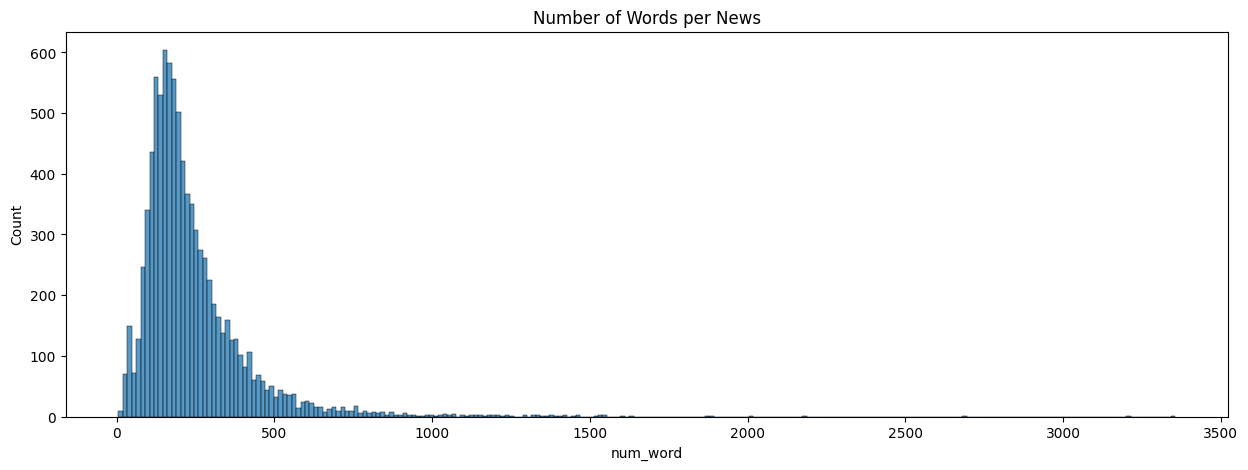

In [50]:
# number of tokens (words) per article
fig, ax = plt.subplots(figsize=(15, 5))
sns.histplot(
    data = df, 
    x = 'num_word',
    palette = 'colorblind',
    ).set(
        title = 'Number of Words per News');

In [51]:
all_token = tokens = df['token'].explode().values
all_token

array(['หนุ่ม', 'ขับ', 'ชน', ..., 'คุ้ม', 'ชาติ', 'รับบท'], dtype=object)

In [52]:
unique_word = len(set(all_token))
unique_word

34039

In [53]:
from collections import Counter

In [54]:
def count_words(df, column='tokens', preprocess=None, min_freq=2):
  # process tokens and update counter
  def update(doc):
    tokens = doc if preprocess is None else preprocess(doc)
    counter.update(tokens)
  
  # create counter and run through all data
  counter = Counter()
  df[column].map(update)

  # transform counter into a DataFrame
  freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
  freq_df = freq_df.query('freq > @min_freq')
  freq_df.index.name = 'token'

  return freq_df.sort_values('freq', ascending=False)

In [55]:
freq_all = count_words(df, column = 'token')
freq_all.head(10)

,freq
token,
คน,17838
ปี,15604
ไทย,12674
บาท,9670
ทำ,8979
เรื่อง,8160
วันที่,7996
ทีม,7655
ผม,7005


In [56]:
import matplotlib as mpl

In [57]:
mpl.font_manager.fontManager.addfont('/content/drive/MyDrive/AI_Tagging/dataset/THSARABUNNEW BOLD.TTF')
mpl.rc('font', family='TH Sarabun New', size=14)

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Top Words os all News')]

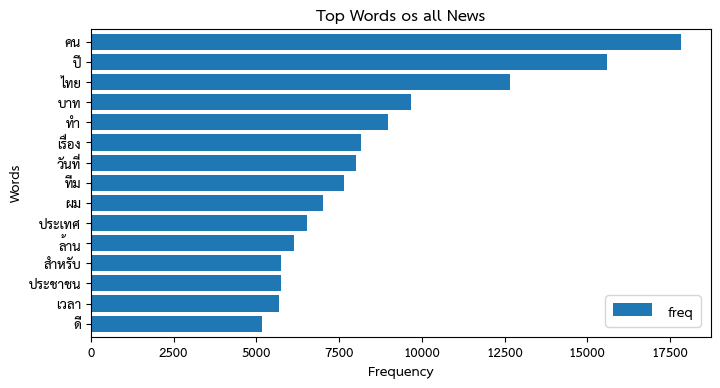

In [58]:
ax = freq_all.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Top Words os all News')

In [59]:
df_crime = df[df['tag'] == "crime"]
df_sport = df[df['tag'] == "sport"]
df_politics = df[df['tag'] == "politics"]
df_business = df[df['tag'] == "business"]
df_tech = df[df['tag'] == "tech"]
df_entertainment = df[df['tag'] == "entertainment"]

In [60]:
print("crime:")
print(df_crime["num_word"].describe())
print("sport:")
print(df_sport["num_word"].describe())
print("politics:")
print(df_politics["num_word"].describe())
print("business:")
print(df_business["num_word"].describe())
print("tech:")
print(df_tech["num_word"].describe())
print("entertainment:")
print(df_entertainment["num_word"].describe())

crime:
count    1500.000000
mean      294.513333
std       182.564554
min        71.000000
25%       193.000000
50%       257.000000
75%       343.000000
max      2006.000000
Name: num_word, dtype: float64
sport:
count    1500.000000
mean      239.043333
std       222.404043
min        21.000000
25%       129.000000
50%       173.000000
75%       271.000000
max      3356.000000
Name: num_word, dtype: float64
politics:
count    1500.000000
mean      227.621333
std       147.875836
min        12.000000
25%       140.750000
50%       196.000000
75%       276.000000
max      2174.000000
Name: num_word, dtype: float64
business:
count    1500.000000
mean      190.626667
std       127.826394
min        21.000000
25%       110.000000
50%       160.000000
75%       235.250000
max       762.000000
Name: num_word, dtype: float64
tech:
count    1500.000000
mean      249.997333
std       171.345692
min        12.000000
25%       163.000000
50%       206.000000
75%       291.000000
max      3209.000

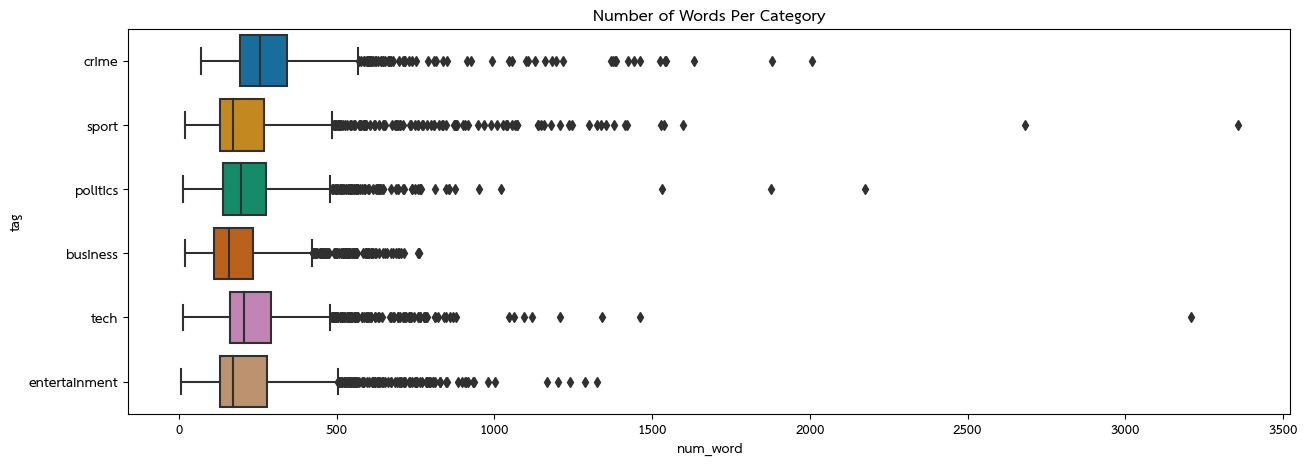

In [61]:
# words per category
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(
    data = df, 
    x = 'num_word', 
    y = 'tag',
    palette = 'colorblind'
    ).set(
        title = 'Number of Words Per Category');

### Crime

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Top Words of Crime News')]

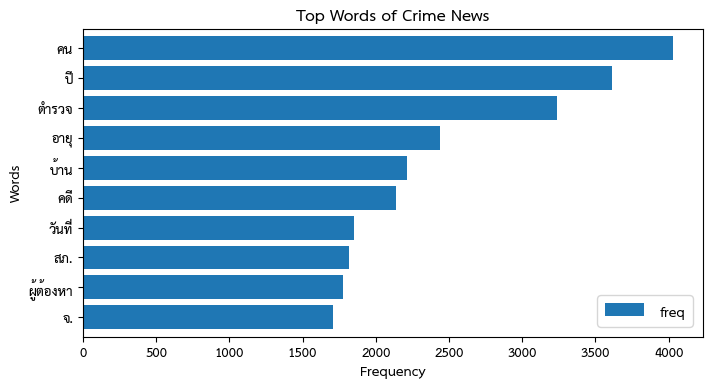

In [62]:
freq_all = count_words(df_crime, column = 'token')
freq_all.head(10)
ax = freq_all.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Top Words of Crime News')

In [63]:
freq = freq_all.reset_index()
word = list(freq.itertuples(index=False, name=None))

(-0.5, 399.5, 199.5, -0.5)

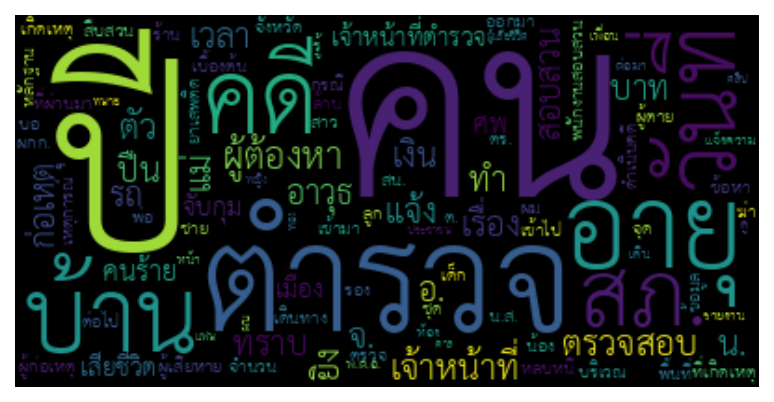

In [64]:
# Create WordCloud which generate from freq
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fp = '/content/drive/MyDrive/AI_Tagging/dataset/THSARABUNNEW.TTF'
wc = WordCloud(max_words=100,stopwords=stopwords,font_path=fp).generate_from_frequencies(frequencies=dict(word))
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Sport

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Top Words of Sport News')]

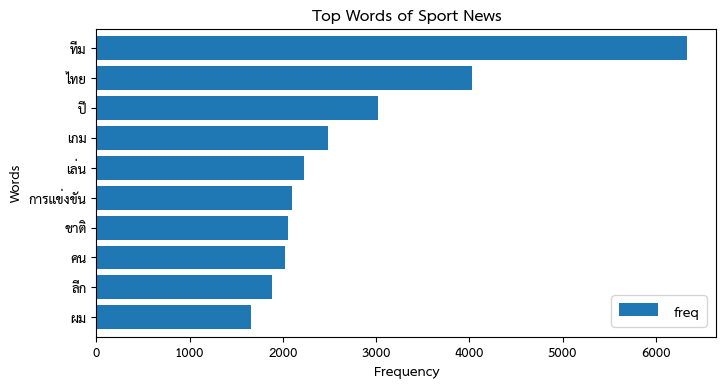

In [65]:
freq_all = count_words(df_sport , column = 'token')
freq_all.head(10)
ax = freq_all.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Top Words of Sport News')

In [66]:
freq = freq_all.reset_index()
word = list(freq.itertuples(index=False, name=None))

(-0.5, 399.5, 199.5, -0.5)

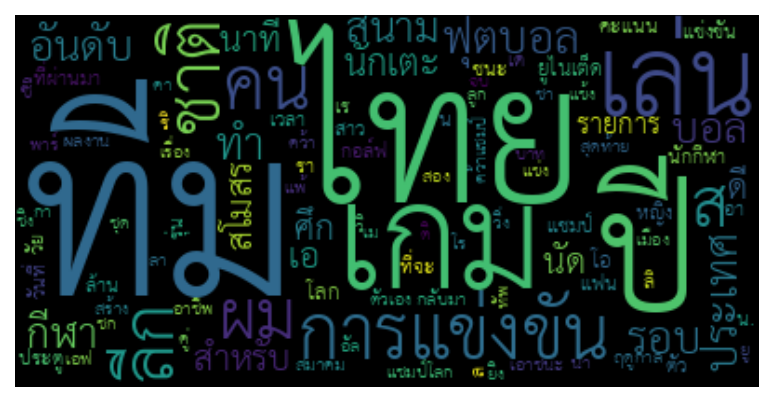

In [67]:
# Create WordCloud which generate from freq
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fp = '/content/drive/MyDrive/AI_Tagging/dataset/THSARABUNNEW.TTF'
wc = WordCloud(max_words=100,stopwords=stopwords,font_path=fp).generate_from_frequencies(frequencies=dict(word))
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Politics

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Top Words of Politic News')]

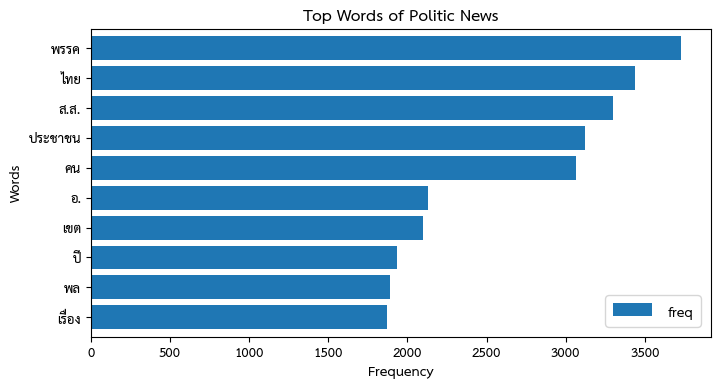

In [68]:
freq_all = count_words(df_politics  , column = 'token')
freq_all.head(10)
ax = freq_all.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Top Words of Politic News')

In [69]:
freq = freq_all.reset_index()
word = list(freq.itertuples(index=False, name=None))

(-0.5, 399.5, 199.5, -0.5)

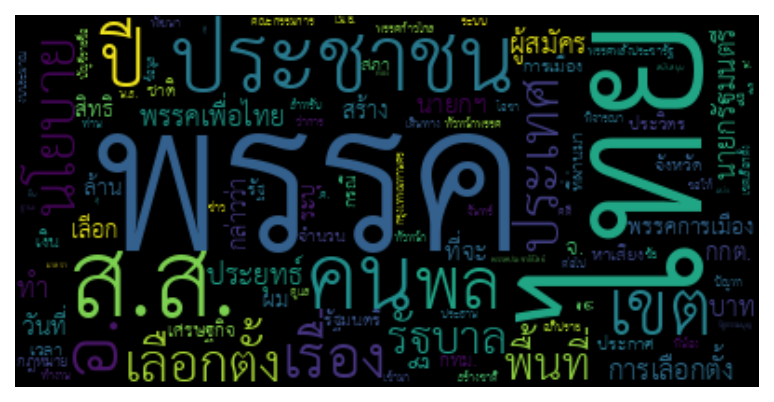

In [70]:
# Create WordCloud which generate from freq
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fp = '/content/drive/MyDrive/AI_Tagging/dataset/THSARABUNNEW.TTF'
wc = WordCloud(max_words=100,stopwords=stopwords,font_path=fp).generate_from_frequencies(frequencies=dict(word))
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Business

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Top Words of Business News')]

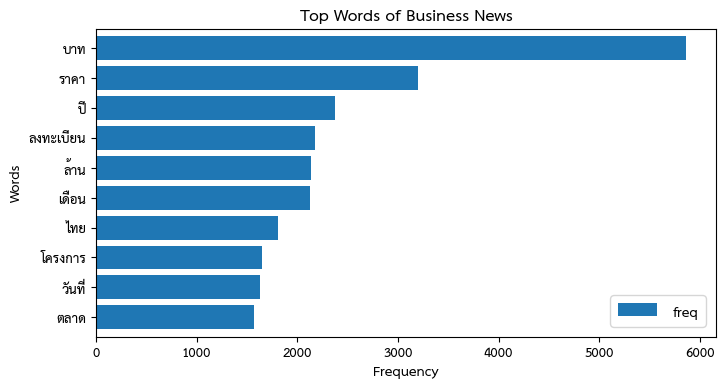

In [71]:
freq_all = count_words(df_business , column = 'token')
freq_all.head(10)
ax = freq_all.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Top Words of Business News')

In [72]:
freq = freq_all.reset_index()
word = list(freq.itertuples(index=False, name=None))

(-0.5, 399.5, 199.5, -0.5)

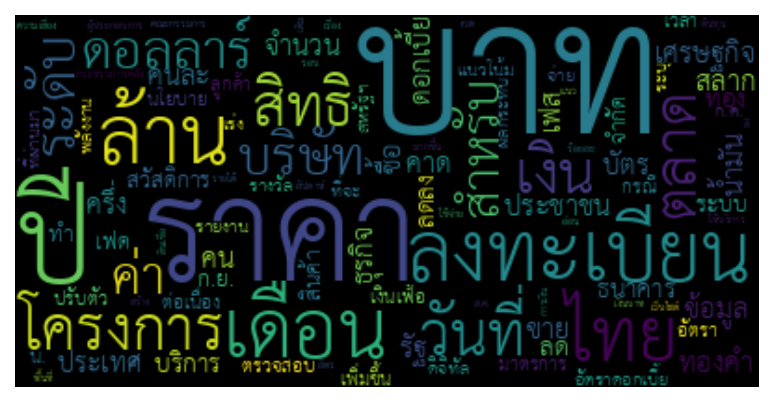

In [73]:
# Create WordCloud which generate from freq
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fp = '/content/drive/MyDrive/AI_Tagging/dataset/THSARABUNNEW.TTF'
wc = WordCloud(max_words=100,stopwords=stopwords,font_path=fp).generate_from_frequencies(frequencies=dict(word))
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Technology

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Top Words of Technology News')]

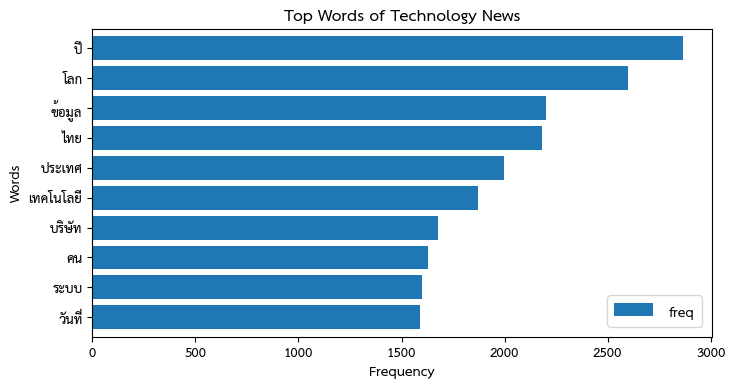

In [74]:
freq_all = count_words(df_tech , column = 'token')
freq_all.head(10)
ax = freq_all.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Top Words of Technology News')

In [75]:
freq = freq_all.reset_index()
word = list(freq.itertuples(index=False, name=None))

(-0.5, 399.5, 199.5, -0.5)

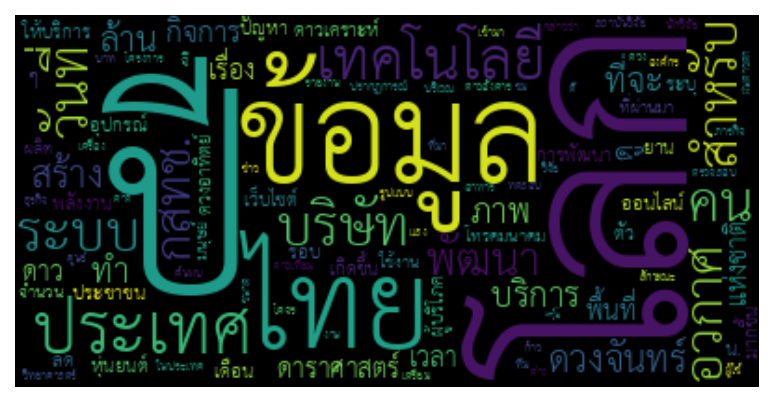

In [76]:
# Create WordCloud which generate from freq
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fp = '/content/drive/MyDrive/AI_Tagging/dataset/THSARABUNNEW.TTF'
wc = WordCloud(max_words=100,stopwords=stopwords,font_path=fp).generate_from_frequencies(frequencies=dict(word))
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

### Entertainment

[Text(0.5, 0, 'Frequency'),
 Text(0, 0.5, 'Words'),
 Text(0.5, 1.0, 'Top Words of Entertainment News')]

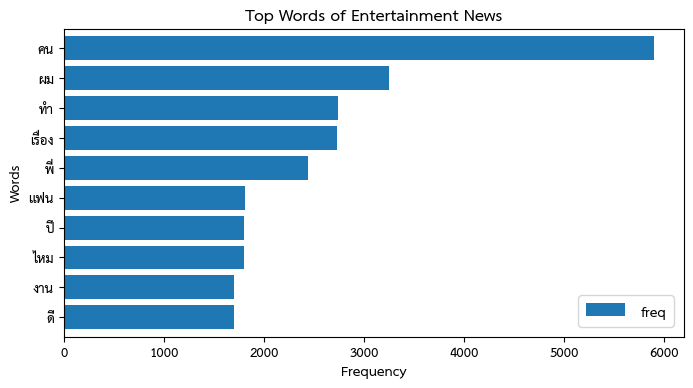

In [77]:
freq_all = count_words(df_entertainment  , column = 'token')
freq_all.head(10)
ax = freq_all.head(10).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Words', title='Top Words of Entertainment News')

In [78]:
freq = freq_all.reset_index()
word = list(freq.itertuples(index=False, name=None))

(-0.5, 399.5, 199.5, -0.5)

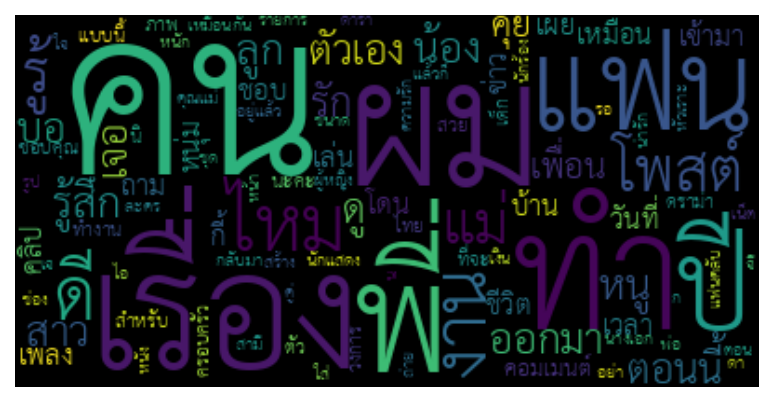

In [79]:
# Create WordCloud which generate from freq
from wordcloud import WordCloud
import matplotlib.pyplot as plt

fp = '/content/drive/MyDrive/AI_Tagging/dataset/THSARABUNNEW.TTF'
wc = WordCloud(max_words=100,stopwords=stopwords,font_path=fp).generate_from_frequencies(frequencies=dict(word))
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

# TFIDF

In [80]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [81]:
def tokenization(text):
  return text.split(' ')

In [82]:
stop_words = list(thai_stopwords())
stop_words[:10]

['คราวๆ',
 'ภายใน',
 'ยาว',
 'ด้วยเพราะ',
 'ครบ',
 'พื้นๆ',
 'คราวโน้น',
 'ฯ',
 'สูงกว่า',
 'เข้า']

In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
  tokenizer = tokenization,             # เพิ่ม Analyzer สำหรับตัดคำ
  stop_words = stop_words,                        # ป้อนรายการคำ Stop words ที่เตรียมไว้
  ngram_range = (1,1),               
  min_df = 5,                                    # ขั้นต่ำของ Doc Freq ของ Term
  max_df = 0.95,
  max_features = int(unique_word*0.5),
  norm='l2', 
  encoding='utf-8'
)

In [84]:
tfidvec_train = tfidf.fit_transform(df['clean'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [85]:
tfidf_df = pd.DataFrame(
    tfidvec_train.toarray(),
    columns = tfidf.get_feature_names_out(),
    index = df.index,
)
tfidf_df

,..,.ค,.ค.,.จ,.บ,.ปค,.ปป,.ปอ,.ปอท.,.ย,...,ไฮไลท์,ๆ.,ๆคน,ๆๆ,ๆๆๆ,ๆๆๆๆ,์,์ส,๑,๓
0,0.0,0.0,0.0,0.077599,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8996,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8997,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8998,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
features = tfidvec_train.toarray()
features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
labels = df.tag_id

In [88]:
from sklearn.feature_selection import chi2
N = 3  # We are going to look for top 3 categories

#For each category, find words that are highly corelated to it
for tag, tag_id in sorted(tag_to_id.items()):
  features_chi2 = chi2(features, labels == tag_id)                        # Do chi2 analyses of all items in this category
  indices = np.argsort(features_chi2[0])                                  # Sorts the indices of features_chi2[0] - the chi-squared stats of each feature
  feature_names = np.array(tfidf.get_feature_names_out())[indices]            # Converts indices to feature names ( in increasing order of chi-squared stat values)
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]         # List of single word features ( in increasing order of chi-squared stat values)
  print("# '{}':".format(tag))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:]))) # Print 3 unigrams with highest Chi squared stat

# 'business':
  . Most correlated unigrams:
       . ลงทะเบียน
       . บาท
       . ราคา
# 'crime':
  . Most correlated unigrams:
       . สภ.
       . ผู้ต้องหา
       . ตำรวจ
# 'entertainment':
  . Most correlated unigrams:
       . โพสต์
       . ไหม
       . พี่
# 'politics':
  . Most correlated unigrams:
       . เลือกตั้ง
       . ส.ส.
       . พรรค
# 'sport':
  . Most correlated unigrams:
       . ลีก
       . เกม
       . ทีม
# 'tech':
  . Most correlated unigrams:
       . หุ่นยนต์
       . ดวงจันทร์
       . อวกาศ


In [89]:
from sklearn.manifold import TSNE

# Sampling a subset of our dataset because t-SNE is computationally expensive
SAMPLE_SIZE = int(len(features) * 0.3)
np.random.seed(0)
indices = np.random.choice(range(len(features)), size=SAMPLE_SIZE, replace=False)          # Randomly select 30 % of samples
projected_features = TSNE(n_components=2, random_state=0).fit_transform(features[indices]) # Array of all projected features of 30% of Randomly chosen samples 
projected_features.shape

(2700, 2)

In [90]:
my_id = 0 # Select a tag_id
projected_features[(labels[indices] == my_id).values]

array([[-5.69044769e-01, -6.66213322e+00],
       [ 7.12958431e+00, -7.85698986e+00],
       [ 1.02888212e+01,  1.67357521e+01],
       [ 1.46456995e+01,  4.65120912e-01],
       [-8.31983852e+00, -1.30505228e+00],
       [ 2.37206879e+01,  2.13770866e+01],
       [ 4.11239576e+00,  5.61456060e+00],
       [-1.59310236e+01,  1.42615247e+00],
       [-9.28905010e-01,  1.00277700e+01],
       [-1.07328138e+01, -6.84279394e+00],
       [-1.49847784e+01, -1.84002914e+01],
       [-1.06413097e+01, -1.58116400e+00],
       [-3.61395502e+00,  4.23733091e+00],
       [-7.25526869e-01, -1.28136005e+01],
       [ 2.40831494e+00,  2.22750211e+00],
       [-4.67416906e+00, -6.90323448e+00],
       [-2.66503906e+00, -9.17125225e+00],
       [ 3.33894300e+00,  3.02269554e+00],
       [ 8.82747364e+00, -8.49213600e+00],
       [-1.78793144e+00,  3.15180244e+01],
       [-2.81051540e+00, -3.58047748e+00],
       [ 3.38962913e+00,  5.63603497e+00],
       [ 4.97467667e-01, -2.71868944e-01],
       [ 2.

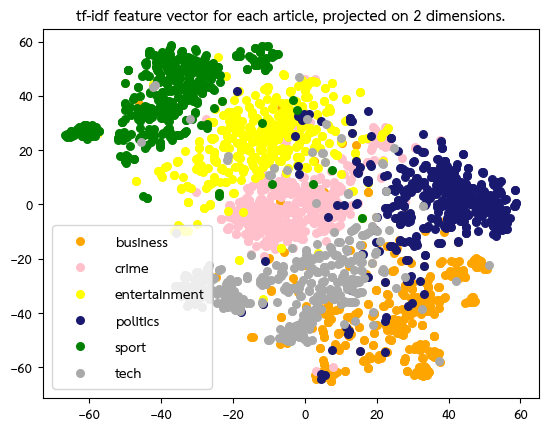

In [91]:
import matplotlib.pyplot as plt

colors = ['pink', 'green', 'midnightblue', 'orange', 'darkgrey', 'yellow']

# Find points belonging to each category and plot them
for tag,tag_id in sorted(tag_to_id.items()):
    points = projected_features[(labels[indices] == tag_id).values]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[tag_id], label=tag)
plt.title("tf-idf feature vector for each article, projected on 2 dimensions.",
          fontdict=dict(fontsize=15))
plt.legend()

In [92]:
import pickle
# Save the trained model to a file
filename = '/content/drive/MyDrive/AI_Tagging/model/tfidf_thai_new.pkl'
pickle.dump((tfidf,tfidvec_train), open(filename, 'wb'))

In [93]:
import joblib

joblib.dump((tfidf,tfidvec_train), "/content/drive/MyDrive/AI_Tagging/model/tfidf_thai.pkl")

['/content/drive/MyDrive/AI_Tagging/model/tfidf_thai.pkl']